<a href="https://colab.research.google.com/github/RokelisK123/gilusis/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQk4anYFFsY3OTqb6RP4oTBhqPM0P1u80tSRA&usqp=CAU" width=75 height=50>

*Algirdas Laukaitis*

<br><br>

---



# PART 1

<font color='SeaGreen'>Download and prepare the CIFAR10 dataset</font>        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/PICOL_Download.svg/1024px-PICOL_Download.svg.png" width=100 height=100>


In [ ]:
#@title The code that loads the CIFAR-10 dataset, a database featuring images of various objects from our world.

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
#@title Normalizing the pixel values is crucial, ensuring our data is ready for the challenges ahead

train_images, test_images = train_images / 255.0, test_images / 255.0

<br><br>

---
###<font color='SeaGreen'>Let's plot the first 100 images </font>


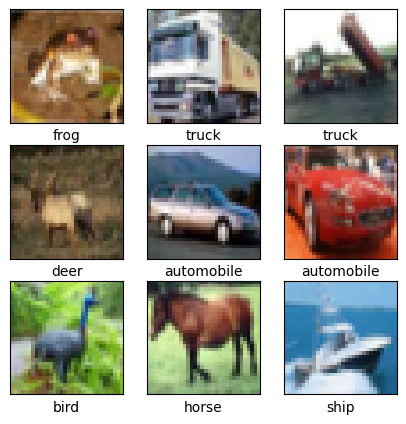

In [ ]:
#@title  Let's navigate through a hundred images from CIFAR-10 to ensure our data is intact. It's essential to know what we're up against.
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


<br><br><br><br>


# <font color='SeaGreen'>Convolutional Autoencoder</font>        <img src="https://upload.wikimedia.org/wikipedia/commons/2/28/Autoencoder_structure.png" width=400 height=250>

<br><br>

---
###<font color='SeaGreen'>Step 2. Model </font>

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
input = layers.Input(shape=(32, 32, 3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

x = layers.Conv2D(3, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)


#x = layers.Flatten()(x)
#x = layers.Dense(10, activation='relu')(x)

# Decoder

x = layers.Conv2DTranspose(1, (3, 3), strides=2, activation="relu", padding="same")(x)

x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(3, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 8, 8, 3)             │             867 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 3)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_10                  │ (None, 8, 8, 1)             │              28 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_11                  │ (None, 16, 16, 32)          │             320 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_12                  │ (None, 32, 32, 32)          │           9,248 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 32, 32, 3)           │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,474 (83.88 KB)

 Trainable params: 21,474 (83.88 KB)

 Non-trainable params: 0 (0.00 B)

<br><br>

---
###<font color='SeaGreen'>Step 3. Train and evaluate the model</font>

In [ ]:


history = autoencoder.fit( x=train_images, y=train_images, epochs=20, batch_size=128,  shuffle=True,  validation_data=(test_images, test_images),)

Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 166s 424ms/step - loss: 0.5909 - val_loss: 0.5912
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 201s 421ms/step - loss: 0.5910 - val_loss: 0.5922
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 202s 423ms/step - loss: 0.5905 - val_loss: 0.5913
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 202s 423ms/step - loss: 0.5905 - val_loss: 0.5909
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 202s 425ms/step - loss: 0.5905 - val_loss: 0.5912
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 203s 429ms/step - loss: 0.5903 - val_loss: 0.5908
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 166s 424ms/step - loss: 0.5901 - val_loss: 0.5911
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 171s 437ms/step - loss: 0.5902 - val_loss: 0.5910
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 198s 426ms/step - loss: 0.5900 - val_loss: 0.5905
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 201s 424ms/step - loss: 0.5896 - val_loss: 0.5905
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 202s 425ms/step - loss: 0.5900 - val_loss: 0.5904
Epoch 12

In [ ]:
decoded_train_imgs = autoencoder.predict(train_images)
decoded_test_imgs = autoencoder.predict(test_images)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step


####<font color='SeaGreen'>Evaluate the model</font>

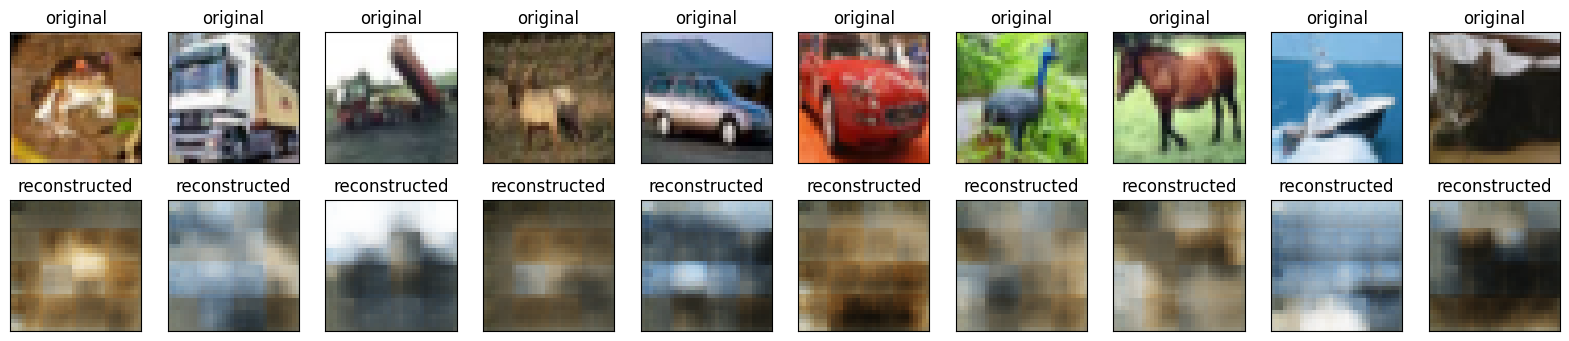

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(train_images[i]) # test_images[i]  train_images[i]
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_train_imgs[i]) # decoded_train_imgs  decoded_test_imgs[i]
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()